## Da Twitter API a  Pandas Dataframe
Creiamo e richiamamiamo una funzione che ci generi direttamente il nostro Pandas Dataframe

### Opzionale:
In questo Jupyter Noboot si è fatto uso di estensioni per splittare la riga.

Potete leggere la dcocumentazione qui:  
http://jupyter-contrib-nbextensions.readthedocs.io/en/latest 

Ed installarle in questo modo:   
pip install jupyter_contrib_nbextension   
jupyter-contrib nbextension install --sys-prefix   

In [1]:
import tweepy
from textblob import TextBlob
import csv

import pandas as pd
import matplotlib.pyplot as plt

#### Salviamo i nostri dati e autentichiamoci

In [2]:
consumer_key = ' '
consumer_secret = ' '

access_token = ' '
access_token_secret = ' '

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [4]:
api = tweepy.API(auth)

#### Creaiamo la nostra funzione (userà il settaggio salvato in precedenza)

In [5]:
def pandas_from_hashtag(hashtag, n):
    """
    This function create a DataFrame from the last n request via Twitter API for a specific hashtag
    
    Parameters
    ----------
    hashtag: str
        The hashtag chosen to perform the API request.
        
    n : int
        The numer of times the API request is performed.

    Returns
    -------
    pandas.core.frame.DataFrame
        The Pandas DataFrames contains the varables 'Date', 'Tweet', 'Polarity', and 'Subjectivity'. 

    """
    
    # Twitter API requests
    csvFile = open('result_%s.csv' %hashtag, 'a') # Open/create a file to append data to
    csvWriter = csv.writer(csvFile) # Use csv writer

    for i in range(n):
        last_tweets = api.search('#%s' %hashtag) # Variable to store the tweets
        for tweet in last_tweets:
            text = TextBlob(tweet.text)
            csvWriter.writerow([tweet.created_at, tweet.text, text.polarity, text.subjectivity])
        
    csvFile.close()
    
    # Creation of the Pandas DataFrame
    df = pd.read_csv('result_%s.csv' %hashtag, header=None, names=['Date', 'Tweet', 'Polarity', 'Subjectivity'])

    return df

#### Richiamiamo la funzione per #joy

In [6]:
df_joy = pandas_from_hashtag('joy', 10)
df_joy.head()

,Date,Tweet,Polarity,Subjectivity
0,2018-03-09 14:25:57,RT @SHVJOY: 💚#조이 #박수영 #JOY https://t.co/Ucpfcy...,0.8,0.2
1,2018-03-09 14:25:47,RT @RVsmtown: MBC 드라마 ‘#위대한유혹자’ #박수영 🌹\n남녀노소 불...,0.8,0.2
2,2018-03-09 14:25:44,RT @WNCJOY: 180308 위대한유혹자 제작발표회\n#조이 #레드벨벳 #박수...,0.8,0.2
3,2018-03-09 14:25:37,RT @RVsmtown: MBC 드라마 ‘#위대한유혹자’ #박수영 🌹\n남녀노소 불...,0.8,0.2
4,2018-03-09 14:25:28,RT @RVsmtown: MBC 드라마 ‘#위대한유혹자’ #박수영 🌹\n남녀노소 불...,0.8,0.2


In [7]:
df_joy.shape

(600, 4)

In [8]:
joy_pos = df_joy[df_joy['Polarity'] >= 0]
print(joy_pos['Polarity'].count(), joy_pos['Polarity'].count())

570 570


#### Richiamiamo la funzione per #hate

In [9]:
df_hate = pandas_from_hashtag('hate', 10)
df_hate.head()

,Date,Tweet,Polarity,Subjectivity
0,2018-03-09 14:24:21,"Blah, blah, blah, blah, blah...here’s an organ...",0.000000,1.000000
1,2018-03-09 14:23:26,RT @Dyke67ny: Never Ending Hate: Republicans l...,-0.800000,0.900000
2,2018-03-09 14:22:59,RT @CornellWBrooks: Thanks. You know the @NAAC...,-0.266667,0.400000
3,2018-03-09 14:15:02,"CALLING ALL PEOPLE: Together, We Can Solve The...",0.000000,0.000000
4,2018-03-09 14:13:21,@jaketapper LOL here is your new @DNC party #...,0.134091,0.638636


In [10]:
df_hate.shape

(400, 4)

In [11]:
hate_pos = df_hate[df_hate['Polarity'] >= 0]
hate_pos['Polarity'].count()

150

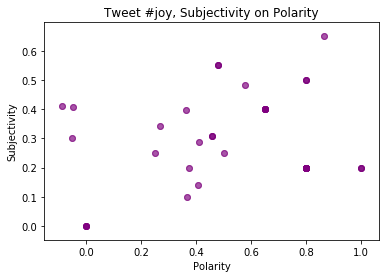

In [12]:
plt.scatter(df_joy['Polarity'], df_joy['Subjectivity'], alpha=0.1, color='purple')

plt.title('Tweet #joy, Subjectivity on Polarity')
plt.ylabel('Subjectivity')
plt.xlabel('Polarity')

plt.show()

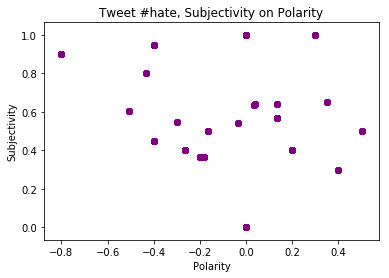

In [13]:
plt.scatter(df_hate['Polarity'], df_hate['Subjectivity'], alpha=0.5, color='purple')

plt.title('Tweet #hate, Subjectivity on Polarity')
plt.ylabel('Subjectivity')
plt.xlabel('Polarity')

plt.show()

In [14]:
df_joy.describe()

,Polarity,Subjectivity
count,600.000000,600.000000
mean,0.628919,0.259073
std,0.277381,0.131029
min,-0.087500,0.000000
25%,0.473674,0.200000
50%,0.800000,0.200000
75%,0.800000,0.317045
max,1.000000,0.650000


In [15]:
df_hate.describe()

,Polarity,Subjectivity
count,400.000000,400.000000
mean,-0.163651,0.567678
std,0.321485,0.249493
min,-0.800000,0.000000
25%,-0.400000,0.400000
50%,-0.175000,0.500000
75%,0.035000,0.687500
max,0.500000,1.000000


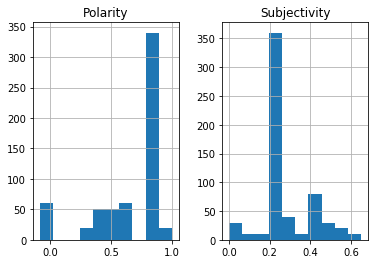

In [16]:
df_joy.hist()
plt.show()

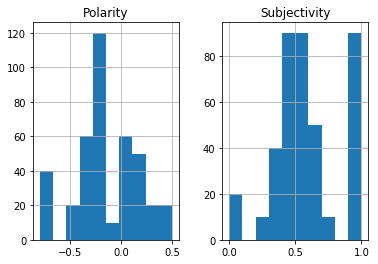

In [17]:
df_hate.hist()
plt.show()